# IMAC 1 : sujet de TP no 2

Voici quelques fonctions élémentaires Python qui vous permettent de visualiser, enregistrer, etc.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io


class signal_mono: 
    pass

## on conviendra que les champs d'un signal_mono sont : 
##  signal.x  : les valeurs du signal 
##  signal.N= : le nombre d'échantillons 
##  signal.Fs : la frequence d'echantillonnage en Hz
##  signal.t : le vecteur des temps associé
## EXEMPLE D'APPLICATION :  plt.plot(signal.t,signal.x)





def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;   ### conversion automatique au format réel et normalisation 


def creer_signal(valeurs,Fs):
    out = signal_mono()
    out.x = normaliser_son_mono(valeurs)
    out.N= np.size(out.x)
    out.Fs=Fs
    out.t=np.arange(out.N)/Fs
    return out

def extraire(signal,t_min,t_max):
    condition = ( signal.t   < t_max )*( signal.t > t_min)
    out= signal_mono
    out.x = np.extract(condition,signal.x)
    out.t=np.extract(condition,signal.t)
    out.N= np.size(out.x)
    out.Fs=signal.Fs
    print(np.size(out.x))
    return out

def enregistrer_son(nom_fichier,signal,Fs):
    y=0.5*normaliser_son_mono(signal.x)  ### le facteur 0.5 pour éviter d'exploser les oreilles...
    scaled = np.round(32767*y)   ### passage en 16 bits
    newdata = scaled.astype(np.int16)   ### conversion en type int
    io.write(nom_fichier, Fs, newdata)   ### codage en wav




## Partie no 1 

Soit $f_0$ une fréquence donnée et G et P deux vecteurs de même taille - disons $N$. Les composantes de $G$ sont positives (ce sont les gains) et celles de $P$ sont des angles exprimés en radians (ce sont les phases) : voir l'exercice no1 de la seconde feuille de TD sur les séries de Fourier. On associe alors le signal 
$$
x(t)=\sum_{n=0}^{N-1}G_n \cos(2\pi n f_0 t+ P_n).
$$

1) Codez  une fonction Python que vous nommerez **creer_signal_periodique** qui à $P,G,f_0$ et aussi une durée $T$ et une fréquence d'échantillonnage $F_s$ retourne un signal de la classe **signal_mono**  

2) Reprenez l'exemple du rectangle périodique, pair, vu en cours. Exprimez les coefficients $G_k$ et $P_k$.

3) Appliquez **creer_signal_periodique** avec les coefficients définis à la question précédente pour le choix des paramètres suivant : $N=20$, $f_0=440$Hz, $T=4$s et $F_s=22050$Hz. Visualisez le signal sur l'intervalle $[1, 1.01]$ (en seoondes) : vous pourrez utiliser la fonction **extraire**. Ensuite, écoutez le signal.

4) Reprenez la question suivante mais, cette fois, au lieu des phases théoriques du rectangle choisissez des phases aléatoires (calculez un échantillon uniforme sur $[0,2\pi]$. Le graphe du signal obtenu  est-il très différent d'un rectangle périodique? Percevez-vous une différence entre le son obtenu et le son du rectangle? 

5) Choisissez un jeu de gains qui engendre, selon vous, un son intéressant (on dirait : un timbre qui vous plait. D'ailleurs, pourquoi vous plait-il?). Modifiez les phases de manière aléatoire et écoutez le "nouveau son". Cette expérience illustre-t-elle le principe selon lequel l'oreille n'est pas sensible aux phases? 

## Partie no 2

Soit le signal de période $2\pi$ défini pour tout entier $k\geq 0$ et tout $t\in[0,2\pi]$ par :  
$$
x_k(t)=t^k.
$$
Notons $c_k[n]$ les coefficients de Fourier de $x_k$. Faites attention à la position des indices! 

1) Rappelez l'expression de $c_k[n]$.

2) Calculez pour tout entier naturel $k$ le coefficient $c_k[0]$.

3) Calculez $c_0[n]$ pour tout $n\neq 0$

4) En effectuant une IPP bien choisie montrez que pour tout $k\geq 1$ et tout $n\neq 0$ on a 
$$
c_k[n]=\frac{i}{n} \left(\alpha_k -\beta_k c_{k-1}[n]   \right)  
$$
où vous déterminerez les constantes $\alpha_k$ et $\beta_k$. 

5) Calculez, en utilisant la formule de récurrence précédente, $c_1[n]$ et $c_2[n]$ pour tout $n\neq 0$. 

6) Soit maintenant la fonction $2\pi$-périodique définie sur $[0,2\pi]$ par 
$$
x(t)=\lambda_1 t +\lambda_2 t^2
$$
où $\lambda_1,\lambda_2$ sont des constantes. 
Quels sont les coefficients de Fourier complexes $c[n]$ de ce signal? (vous utiliserez les résultas de la question qui précède)

7) Afin de répondre à la question  qui suit, reportez-vous aux résultats de l'exercice 4 de la seconde feuille d'exercices sur les séries de Fourier. 
   Quelle est la condition sur $\lambda_1$ et $\lambda_2$ pour que le signal soit continu sur $\mathbb{R}$? A quelle vitesse décroissent les coefficents de Fourier? Est-ce surprenant? 
   
8) (optionnel) Si maintenant $x(t)=\lambda_1 t +\lambda_2 t^2+\lambda_3 t^3$, quel(s) choix de $\lambda_1,\lambda_2,\lambda_2$ assure(nt) une décroissance des coefficients de Fourier en $\mathcal{O}(1/n^3)$? Que cela implique-t-il sur la régularité de la fonction $x(t)$? 
   
## Partie no 3

Soit un son de  hauteur $f_0$. On lui associe l'accord parfait majeur (son initial auquel on superpose sa tierce Majeure supérieure et sa quinte supérieure).

1) Synthétiser l'accord parfait évoqué lorsque le son initial est pur (une seule sinusoïde de fréquence $f_0$) et que les rapports de fréquences sont exacts : $5/4$ pour la tierce Majeur et $3/2$ pour la quinte.
2) Reprendre la question précédente mais avec des rapports tempérés : $2^{4/12}$ et $2^{7/12}$ respectivement pour la tierce Majeure et la quinte. Entendez-vous une différence avec l'accord parfait de la question précédente? 
3) Reprenez les deux questions précédentes mais cette fois, vous choisirez un son initial composite (c'est-à-dire avec des harmoniques).  


## Partie no 4 (optionnelle)

Reprenons le problème des cordes vibrantes. On suppose que la forme de la corde à l'instant initial - la fonction notée $y(0,u)$ pour $u\in [0,L]$ où $L$ est la longueur de la corde -  est un triangle de hauteur $h$ dont la pointe est d'abcisse $0<u_0<L$. On complète cette fonction (on appelle $\psi(u)$ la complétée) par symétrie impaire : voir la figure ci-dessous.  La courbe en bleu est la forme de la corde, et celel en rouge la complétée de la courbe bleue par symétrie impaire.

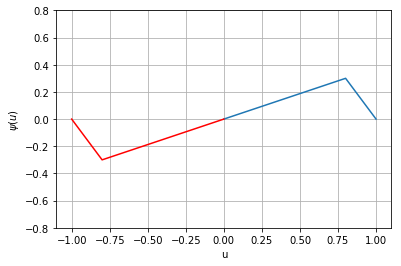

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io
h=0.3
u0=0.8
L=1
plt.plot([0, u0 , L],[0, h , 0])
plt.plot([0, -u0 , -L],[0, -h , 0],color='red')
plt.ylim(-0.8,0.8)
plt.xlabel('u')
plt.ylabel(r'$\psi(u)$')
#plt.xticks([], [])
#plt.yticks([1], [1,1])
plt.grid()

On se rappelle alors que la solution de l'équation des cordes vibrantes est 
$$
y(t,u)=\sum_{n=1}^{\infty} b_n \cos(2\pi n f_0 t)\sin(\frac{\pi n u }{L})
$$
où la fréquence fondamentale $f_0$ est donnée par ($T$ est la tension de la corde et $\mu$ la masse de la corde par unité de longueur)
$$
f_0=\sqrt{\frac{T}{\mu}}\frac{1}{2L}
$$
et les $b_n$ sont les coefficients de Fourier de la fonction $\psi$ (étendue par périodicité de période $2L$). 

1) Calculez  $b_n$ en fonction de $h,L,u_0,n$.

2) Quel doit être le rapport $u_0/L$ pour que la 7ème harmonique (qui entraîne un son peu agréable) soit nulle, c'est-à-dire pour que $b_7=0$? 


# Rendu du TP  
  
# Partie n°1
**Question 1)**  
Nous avons :
$$
x(t)=\sum_{n=0}^{N-1}G_n \cos(2\pi n f_0 t+ P_n)
$$  
On peut donc créer la fonction **creer_signal_periodique** qui à $P,G,f_0$ et aussi une durée $T$ et une fréquence d'échantillonnage $F_s$ retourne un signal de la classe **signal_mono**

In [14]:
def creer_signal_periodique(P, G, f0, T, Fs):
    signalTab = np.zeros(T.size)
    
    for i in range(0, T.size):
        t = i/Fs

        for n in range (0, G.size):
            signalTab[i] += G[n] * np.cos( 2*np.pi*(2*n + 1)*f0*t + P[n] )
          
        signalTab[i] *= 2/np.pi
        signalTab[i] += 1/2

    signal = creer_signal(signalTab, Fs)
    return signal

**Question 2)**  
On sait qu'un signal rectangle périodique pair est défini par:
$$x(t)=
\begin{cases}
1 \text{ si } |t|\leq \frac{1}{4}\\
0 \text{ si } \frac{1}{4}<|t| \leq \frac{1}{2}
\end{cases}\\
$$ 

In [15]:
def rectangle(t, f0):
    T0 = 1/f0
    x = ( ((t%T0) <= 0.25*T0) | ((t%T0) >= 0.75*T0))
    return x

On a d'après le cours:
$$\fbox{$G_k = \frac{(-1)^k}{2k+1}$}$$
$$\fbox{$P_k = 0$}$$  
On peut donc créer la fonction getGain(N) qui nous permettra de l'obtenir plus tard :

In [16]:
def getGain(N):
    G = np.arange(N, dtype = np.float)
    for n in range(G.size):
        G[n] = ((-1)**n) / (2*n +1)
    return G

**Question 3)**  
On applique la fonction **creer_signal_periodique** avec $N = 20, f_0 = 440H_z, T = 4s$ et $F_s = 22050H_z$  
Il nous faut donc un tableau de temps t qui dure 4 secondes, et un gain de taille 20

In [17]:
t = np.arange(0, 4, 1/22050)
G = getGain(20)
P = np.zeros(20)

On peut maintenant calculer notre rectangle grâce à la fonction proposée dans la Question 2):

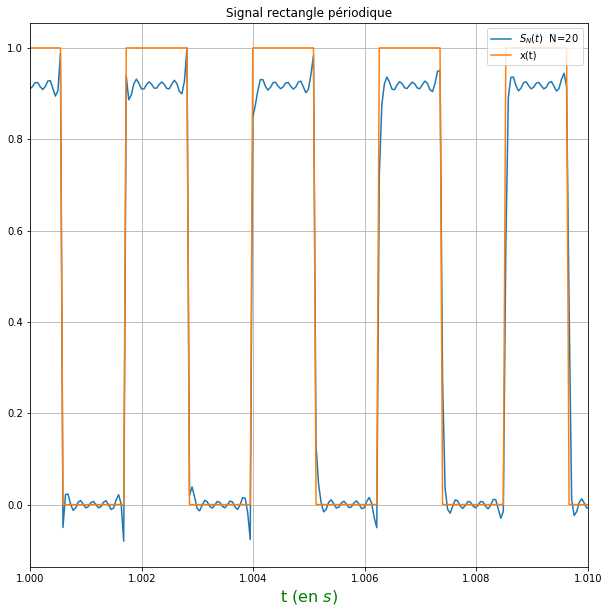

In [18]:
rect = rectangle(t, 440)
signal = creer_signal_periodique(P, G, 440, t, 22050)

plt.figure(1, figsize = (10, 10))
plt.plot(signal.t, signal.x, label=r'$S_N(t)$  N=20')
plt.plot(t, rect, label=r'x(t)')
plt.legend(loc='upper right')
plt.xlabel('t (en $s$)',color = 'green', fontsize = 16)
plt.title('Signal rectangle périodique')
plt.grid()
plt.xlim(1, 1.01)
plt.show()

enregistrer_son("1_signal_rectangle.wav", signal, 22050)

**Question 4)**  
On définit un échantillon de phases aléatoires sur $[0,2\pi]$ :

In [19]:
def getPhase(N):
    P = np.random.uniform(0, 2*np.pi, N)
    return P

On crée maintenant un nouveau signal avec cette fois les phases aléatoires :

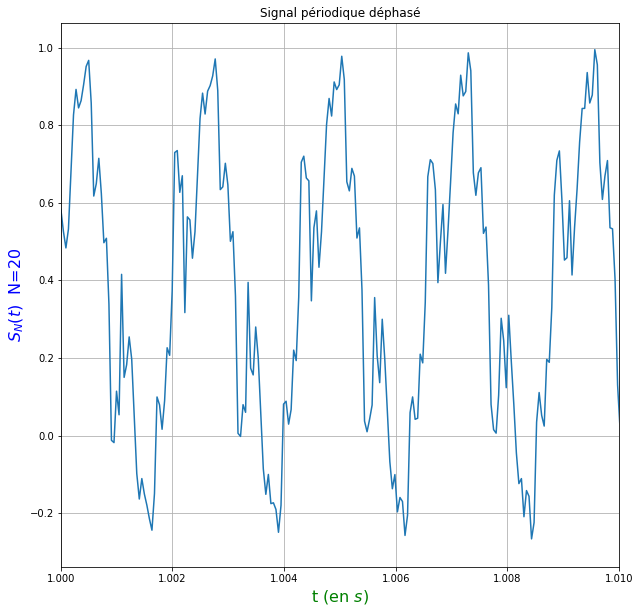

In [20]:
signal2 = creer_signal_periodique(getPhase(20), G, 440, t, 22050)

plt.figure(1, figsize = (10, 10))
plt.plot(signal2.t, signal2.x)
plt.xlabel('t (en $s$)',color = 'green', fontsize = 16)
plt.ylabel('$S_N(t)$  N=20',color = 'blue', fontsize = 16)
plt.title('Signal périodique déphasé')
plt.grid()
plt.xlim(1, 1.01)
plt.show()

enregistrer_son("1_signal_phases_aleatoires.wav", signal2, 22050)

Le graphe du signal obtenu est très différent du graphe du rectangle périodique.  
Le son exporté ne semble pourtant pas différent.

**Question 5)**  


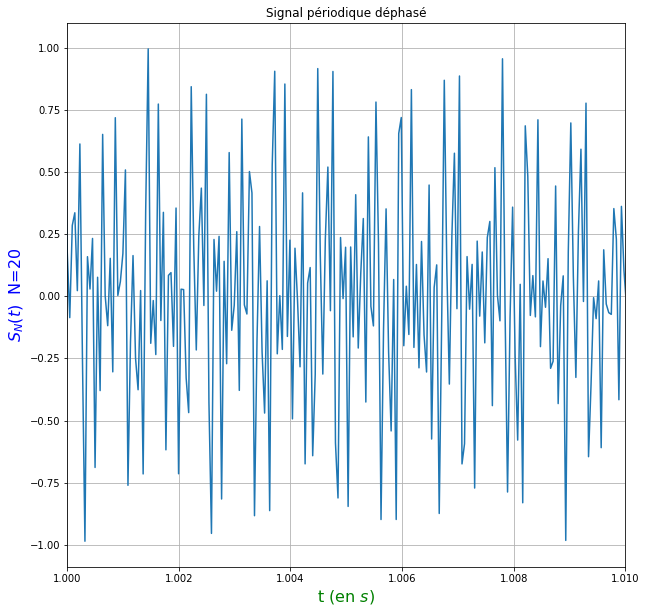

In [21]:
def getGain2(N):
    G = np.arange(N, dtype = np.float)
    for n in range(G.size):
        G[n] = 28*n%42
    return G

signal3 = creer_signal_periodique(getPhase(20), getGain2(20), 440, t, 22050)

plt.figure(1, figsize = (10, 10))
plt.plot(signal3.t, signal3.x)
plt.xlabel('t (en $s$)',color = 'green', fontsize = 16)
plt.ylabel('$S_N(t)$  N=20',color = 'blue', fontsize = 16)
plt.title('Signal périodique déphasé')
plt.grid()
plt.xlim(1, 1.01)
plt.show()

enregistrer_son("1_signal_gain_aleatoires.wav", signal3, 22050)

Le changement de gain est perceptible (ce son semble plus lointain, un peu comme si on entendait le son depuis un téléphone). Cependant le déphasage ne se distingue pas.

# Partie n°2

**Question 1)**
L'expression de $c_{k}[n]$ est :
$$c_{k}[n] = \frac{1}{2\pi} \int_{0}^{2\pi} x_{k}(t)e^{ \frac{-i2\pi*nt}{2\pi} } dt \\ \fbox{$= \frac{1}{2\pi} \int_{0}^{2\pi} t^{k}e^{-int} dt$}$$
  
**Question 2)**
On calcule le coefficient $c_k[0]$ :

$$c_{k}[0]  = \frac{1}{2\pi} \int_{0}^{2\pi} x_{k}(t)e^{-i*0*t} dt \\  = \frac{1}{2\pi} \int_{0}^{2\pi} t^{k} dt \\ = \frac{1}{2\pi} \left[\frac{1}{k+1} t^{k+1}\right]_{0}^{2\pi} \\ = \frac{(2\pi)^{k}}{2\pi(k+1)} \\ \fbox{$= \frac{(2\pi)^k}{k+1}$}$$

**Question 3)**
L'expression de $c_0[n]$ pour tout $n\neq 0$ est :

$$c_{0}[n] = \frac{1}{2\pi} \int_{0}^{2\pi} e^{-int} dt \\ = \frac{1}{2\pi} \left[\frac{i}{n} e^{-int}\right]_{0}^{2\pi} \\ \fbox{$= \frac{i\left(e^{-i2\pi n} - 1\right)}{2\pi n}$}$$  
On peut simplifier grâce à $e^{i\theta}-e^{-i\theta} = 2isin(\theta)$.  
On a donc :
$$c_{0}[n] = \frac{ie^{-i\pi n}\left(e^{-i\pi n} - e^{i\pi n} \right)}{2\pi n} \\ = \frac{sin(\pi n)*e^{-i\pi n}}{\pi n}$$  
Or $sin(\pi n)$ est toujours égal à 0.  
On a donc
$$\fbox{$c_{0}[n] = 0$}$$

**Question 4)**
Trouvons les constantes $\alpha_k$ et $\beta_k$ telles que $c_k[n]=\frac{i}{n} \left(\alpha_k -\beta_k c_{k-1}[n]   \right)$ :

$$c_{k}[n] = \frac{1}{2\pi} \int_{0}^{2\pi} t^{k}e^{-int} dt$$
  
On pose $u = t^{k}$ et $v' = e^{-int}$. On obtient donc $u' = kt^{k-1}$ et $v = \frac{i}{n}e^{-int}$.  
On fait notre IPP et on a :
$$c_{k}[n] = \frac{1}{2\pi} \left( \left[t^{k}*\frac{i}{n}*e^{-int}\right]_{0}^{2\pi} - \int_{0}^{2\pi} kt^{k-1}*\frac{i}{n}*e^{-int} dt\right) = \frac{1}{2\pi} \left((2\pi)^{k}*\frac{i}{n} - \frac{i}{n}*k*\int_{0}^{2\pi} t^{k-1}e^{-int} dt\right)$$

On a donc :
$$\fbox{$c_{k}[n] = \frac{i}{n}\left((2\pi)^{k-1} - \frac{k}{2\pi}*c_{k-1}[n]\right)$}$$
Donc $\fbox{$\alpha_{k} = (2\pi)^{k-1}$}$ et $\fbox{$\beta_{k} = -\frac{k}{2\pi}$}$

**Question 5)**
Calculons $c_1[n]$ et $c_2[n]$ pour tout $n\neq 0$ :  

En premier $c_{1}[n]$ :
$$c_{1}[n] = \frac{i}{n}(\alpha_{1} - \beta_{1}c_{0}[n]) \\= \frac{i}{n}\left((2\pi)^{0} - \frac{1}{2\pi}*0\right) \\= \fbox{$\frac{i}{n}$}$$

Et maintenant $c_{2}[n]$ :  
$$c_{2}[n] = \frac{i}{n}(\alpha_{2} - \beta_{2}c_{1}[n]) \\= \frac{i}{n}\left(2\pi - \frac{1}{\pi}*\frac{i}{n}\right) \\= \fbox{$\frac{2\pi i}{n} +\frac{1}{\pi n^{2}}$}$$

**Question 6)** 
On remarque que $x(t) = \lambda_{1}x_{1}(t) + \lambda_{2}x_{2}(t)$
Donc les coefficients de Fourier complexes $c[n]$ de ce signal sont :
$$c[n] = \lambda_{1}c_{1}[n] + \lambda_{2}c_{2}[n] \\= \fbox{$\frac{i\lambda_{1}}{n} + \lambda_{2}\left(\frac{2\pi i}{n} +\frac{1}{\pi n^{2}}\right)$}$$

**Question 7)**
Si les coefficients de Fourier du signal décroissent en un $\mathcal{O}\left(\frac{1}{n}\right)$, alors le signal est discontinu. Il faut donc que les coefficients se compensent afin qu'on ait un $\mathcal{O}\left(\frac{1}{n^{2}}\right)$.  
On a donc :
$$c[n] = \lambda_{1}c_{1}[n] + \lambda_{2}c_{2}[n] \\ \iff c[n] = \frac{\lambda_{1}i}{n} + \lambda_{2}\left(\frac{2i\pi}{n} + \frac{1}{\pi n^{2}}\right)$$  
Donc la condition sur $\lambda_1$ et $\lambda_2$ pour que le signal soit continu est que $\fbox{$\lambda_1 = -2\pi \lambda_2$}$. Donc on peut poser $\lambda_1 = 2\pi$ et $\lambda_2 = -1$ par exemple.  
Les coefficients de Fourier, avec cette condition, décroissent donc à une vitesse de $\frac{1}{n}$.  

**Question 8)**
Si maintenant $x(t)=\lambda_1 t +\lambda_2 t^2+\lambda_3 t^3$, on a alors les coefficients de Fourier qui sont $c[n] = \lambda_{1}c_{1}[n] + \lambda_{2}c_{2}[n] + \lambda_3c_3[n]$. On va donc les calculer afin de trouver $\lambda_{1}$, $\lambda_{2}$ et $\lambda_{3}$ tels que les coefficients de Fourier décroissent à $\mathcal{O}\left(\frac{1}{n^3}\right)$. On a donc :
$$c[n] = \lambda_{1}c_{1}[n] + \lambda_{2}c_{2}[n] + \lambda_{3}c_{3}[n]$$  
Or $c_{1}[n] = \frac{i}{n}$  
$c_{2}[n] = \frac{2\pi i}{n} +\frac{1}{\pi n^{2}}$  
et $c_{3}[n] = \frac{i}{n}\left((2\pi)^{2} - \frac{3}{2\pi}*c_{2}[n]\right) \\
= \frac{i}{n}\left(4\pi^{2} - \frac{3}{2\pi}\left(\frac{2i\pi}{n} + \frac{1}{\pi n^2}\right)\right) \\
=\frac{i}{n}\left(4\pi^{2} - \frac{3i}{n} - \frac{3}{2(\pi n)^2}\right)$  
Donc on a :
$$c[n] = \lambda_{1}\frac{i}{n} + \lambda_{2}\left(\frac{2\pi i}{n} +\frac{1}{\pi n^{2}}\right) + \lambda_{3}\frac{i}{n}\left(4\pi^{2} - \frac{3}{n} - \frac{3i}{2(\pi n)^2}\right)
$$  
On isole les facteurs de $\frac{1}{n}$ et $\frac{1}{n^2}$, car on veut que ceux-ci soient égaux à 0.  
$$c[n] = \frac{1}{n}\left(\lambda_1i + 2i\pi \lambda_2 + 4i\pi^{2}\lambda_3 \right) + \frac{1}{n^2}\left(\frac{\lambda_2}{\pi} + 3\lambda_3 \right) + \frac{1}{n^3}\left(-\frac{3i\lambda_3}{2\pi^2}\right)$$  
On obtient donc le système :  
$$\begin{cases}
\lambda_1i + 2i\pi \lambda_2 + 4i\pi^2 \lambda_3 = 0 \\
\frac{\lambda_2}{\pi} + 3\lambda_3 = 0
\end{cases}\\
\iff \begin{cases}
\lambda_3 = -\frac{\lambda_2}{3\pi} \\
\lambda_1 + 2\pi \lambda_2 - \frac{4}{3} \pi \lambda_2 = 0
\end{cases}\\
\iff \begin{cases}
\lambda_3 = -\frac{\lambda_2}{3\pi} \\
\lambda_1 = -\frac{2}{3} \pi \lambda_2
\end{cases}
$$
  
Donc les coefficients de Fourier décroissent à $\mathcal{O}\left(\frac{1}{n^3}\right)$ si on a par exemple $\fbox{$\lambda_1 = -\frac{2}{3} \pi$}$, $\fbox{$\lambda_2 = 1$}$ et $\fbox{$\lambda_3 = -\frac{1}{3\pi}$}$

# Partie 3  
**Question 1)**  
On synthétise l'accord parfait évoqué lorsque le son initial est pur. Pour cela on crée à nouveau un tableau de temps sur 4 secondes, un gain égal à 0 sauf en 1, où il est égal à 1 et une phase de 0 :

In [23]:
t = np.arange(0, 4, 1/22050)
G = np.zeros(20)
G[0] = 1
P = np.zeros(20)

On crée maintenant le La 440Hz, ainsi que sa tierce et sa quinte.

In [24]:
la = creer_signal_periodique(P, G, 440, t, 22050)
tierce = creer_signal_periodique(P, G, 1.25 * 440, t, 22050)
quinte = creer_signal_periodique(P, G, 1.5 * 440, t, 22050)

On synthétise maintenant l'accord

In [25]:
accordParfait = creer_signal(la.x + tierce.x + quinte.x, 22050)

On recrée également l'accord parfait généré avec des sinus afin de l'intégrer au graphe

In [26]:
accordParfaitSin = creer_signal(np.sin(2*np.pi*440*t) + np.sin(2*np.pi*1.5*440*t) + np.sin(2*np.pi*1.25*440*t), 22050)

On dessine maintenant le graphe avec nos deux échantillons

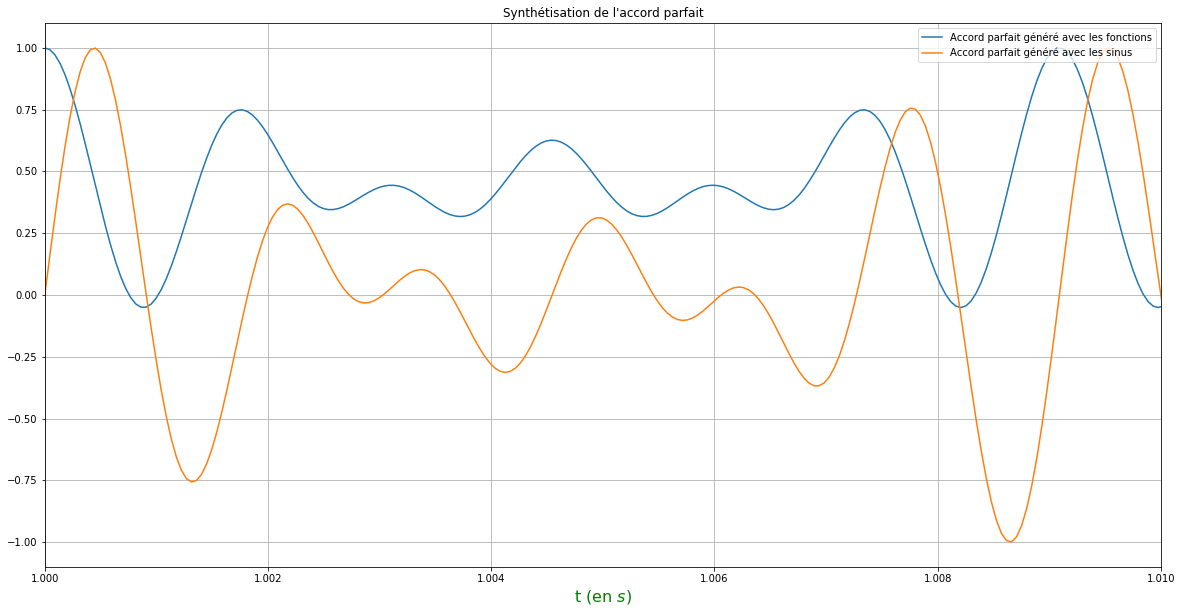

In [27]:
plt.figure(1, figsize = (20, 10))
plt.plot(t, accordParfait.x, label=r'Accord parfait généré avec les fonctions')
plt.plot(t, accordParfaitSin.x, label=r'Accord parfait généré avec les sinus')
plt.legend(loc='upper right')
plt.xlabel('t (en $s$)',color = 'green', fontsize = 16)
plt.title("Synthétisation de l'accord parfait")
plt.xlim(1, 1.01)
plt.grid()
plt.show()

enregistrer_son("3_signal_accord_parfait.wav", accordParfait, 22050)

**Question 2)**  
On synthétise un accord avec des rapports de fréquences de $2^{\frac{4}{12}}$ et $2^{\frac{7}{12}}$.  
On garde donc notre gain et notre phase. Le La reste le même, on crée juste deux nouveaux signaux : la tierce Majeure et la quinte 

In [29]:
tierceM = creer_signal_periodique(P, G, 2**(4/12)* 440, t, 22050)
quinteM = creer_signal_periodique(P, G, 2**(7/12) * 440, t, 22050)

On synthétise le nouvel accord

In [30]:
accordParfaitMajeur = creer_signal(la.x + tierceM.x + quinteM.x, 22050)

Et on dessine un nouveau graphe

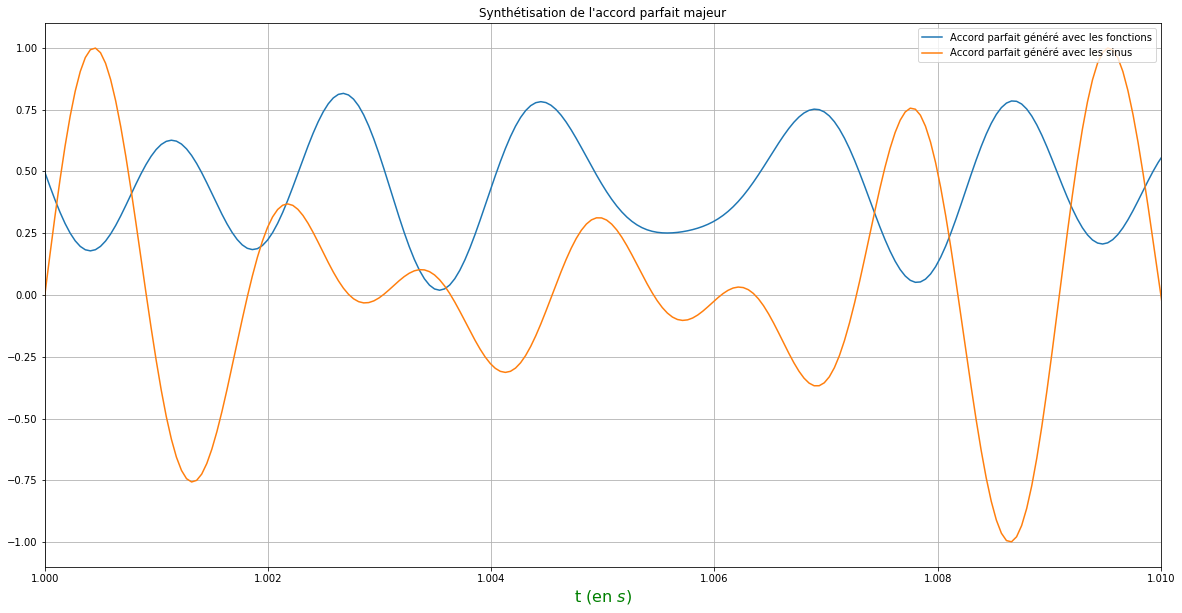

In [31]:
plt.figure(1, figsize = (20, 10))
plt.plot(t, accordParfaitMajeur.x, label=r'Accord parfait généré avec les fonctions')
plt.plot(t, accordParfaitSin.x, label=r'Accord parfait généré avec les sinus')
plt.legend(loc='upper right')
plt.xlabel('t (en $s$)',color = 'green', fontsize = 16)
plt.title("Synthétisation de l'accord parfait majeur")
plt.xlim(1, 1.01)
plt.grid()
plt.show()

enregistrer_son("3_signal_accord_parfait_majeur.wav", accordParfaitMajeur, 22050)

Entendez-vous une différence avec l'accord parfait de la question précédente ?

**Question 3)**  
***a)***  
On veut avoir un son composite, donc un son dont le gain n'est pas égal à 0 partout.

In [32]:
G2 = np.full(20, 3)

Avec le gain créé ci-dessus, on recrée le La 440, sa tierce et sa quinte. On synthétise ensuite l'accord

In [33]:
laComp = creer_signal_periodique(P, G2, 440, t, 22050)
tierceComp = creer_signal_periodique(P, G2, 1.25 * 440, t, 22050)
quinteComp = creer_signal_periodique(P, G2, 1.5 * 440, t, 22050)
accordParfaitComp = creer_signal(laComp.x + tierceComp.x + quinteComp.x, 22050)

On dessine le graphe obtenu :

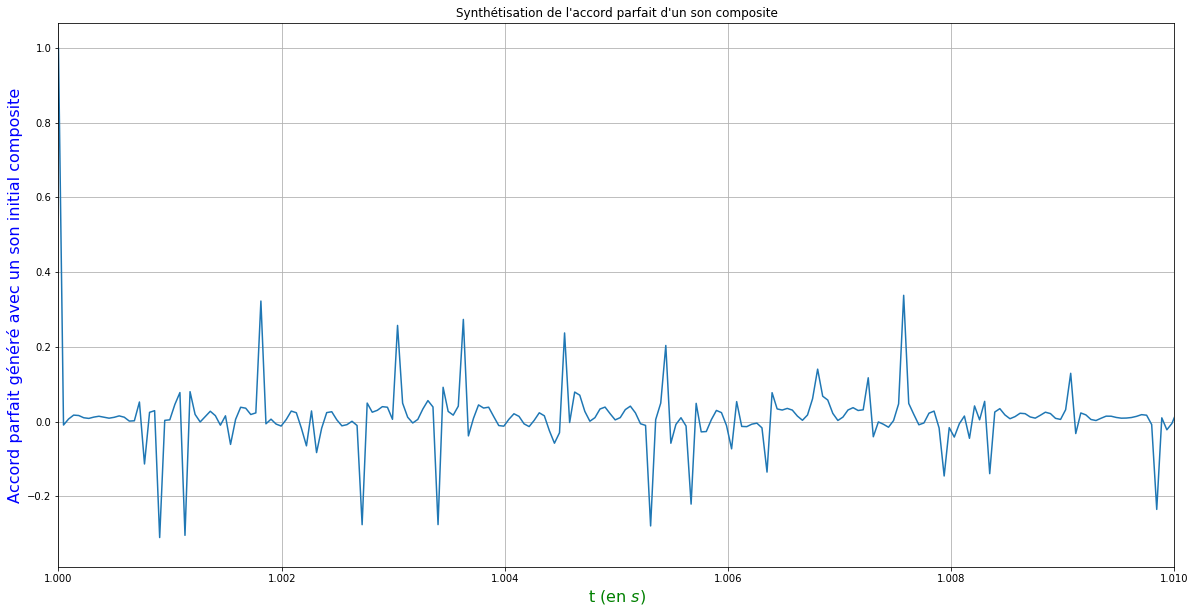

In [34]:
plt.figure(1, figsize = (20, 10))
plt.plot(t, accordParfaitComp.x)
plt.xlabel('t (en $s$)',color = 'green', fontsize = 16)
plt.ylabel('Accord parfait généré avec un son initial composite',color = 'blue', fontsize = 16)
plt.title("Synthétisation de l'accord parfait d'un son composite")
plt.xlim(1, 1.01)
plt.grid()
plt.show()

enregistrer_son("3_signal_accord_parfait_comp.wav", accordParfaitComp, 22050)

***b)***  
On synthétise ce son composite maintenant avec des rapports de fréquence de $2^\frac{4}{12}$ et $2^\frac{7}{12}$.  
On crée la tierce Majeure et la quinte

In [35]:
tierceMComp = creer_signal_periodique(P, G2, 2**(4/12)* 440, t, 22050)
quinteMComp = creer_signal_periodique(P, G2, 2**(7/12) * 440, t, 22050)

On synthétise le son avec la tierce et la quinte :

In [36]:
accordParfaitMajeurComp = creer_signal(laComp.x + tierceMComp.x + quinteMComp.x, 22050)

Et on dessine un nouveau graphe

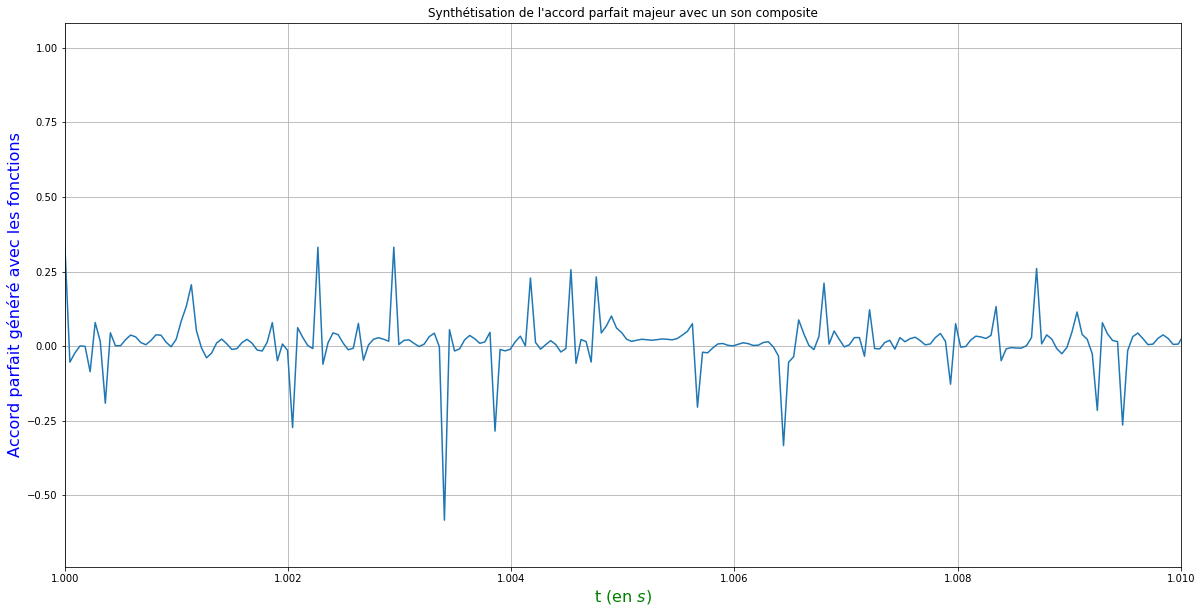

In [37]:
plt.figure(1, figsize = (20, 10))
plt.plot(t, accordParfaitMajeurComp.x)
plt.xlabel('t (en $s$)',color = 'green', fontsize = 16)
plt.ylabel('Accord parfait généré avec un son initial composite', color = 'blue', fontsize = 16)
plt.title("Synthétisation de l'accord parfait majeur d'un son composite")
plt.xlim(1, 1.01)
plt.grid()
plt.show()

enregistrer_son("3_signal_accord_parfait_majeur_comp.wav", accordParfaitMajeur, 22050)